<a href="https://colab.research.google.com/github/hfmandell/Pai-ML-Ai-Workshops/blob/main/Session4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 4: Miscallaneous topics in ML

#### **Note to self: remember to record**

This is the notebook for the fourth session of the Spring 2020 [P-ai](http://www.p-ai.org) workshops.
It covers a number of topics in ML, including a deeper dive into neural networks, other ML algorithms, and some key takeaways from the session.

<img src="https://velocityglobal.com/wp-content/uploads/2019/02/Blog-Images-Forget-Machine-Learning-Humans-Still-Have-a-Lot-to-Learn-Part-II.jpg">


## Topics
- Feed-forward Neural Nets (again)
  - MLPs
  - CNNs
  - LSTMs
- Decision Trees
- k-Nearest Neighbours
- k-Means Clustering
- Support Vector Machines
- Random Forest ensemble
- Voting Classifiers
- Key takeaways

## Part 1: Feed-forward Neural Nets (again)

### A simple example

Let's say we have a few features we want to make a prediction on. Let's say you have a text, and you calculate the frequency of each letter in the alphabet and want to predict whether the language is English, Spanish, or German.

The features would look like:
- $x_1$ frequency of the letter a
- $x_2$ frequency of the letter b

...

- $x_{26}$ frequency of the letter z

Suppose we ignore other characters like ñ or ö, although if we were really doing this classification problem, that would be a very poor design choice (these special characters would actually be very predictive!).

If we are assuming there were a single linear combination of these features that would result in the probability of the language being English, we could express that like this:

$w_{1,e}x_1 + w_{2,e}x_2 + {...} + w_{26,e}x_{26} + b_e = y_1$

And similarly for Spanish and German, but with different weights.

$w_{1,s}x_1 + w_{2,s}x_2 + {...} + w_{26,s}x_{26} + b_s = y_2$

$w_{1,g}x_1 + w_{2,g}x_2 + {...} + w_{26,g}x_{26} + b_g = y_3$

Note how every feature ($x_1$ through $x_{26}$) gets 'sent' to all three outputs. Conversely, each output receives all the inputs. We can illustrate that like this:

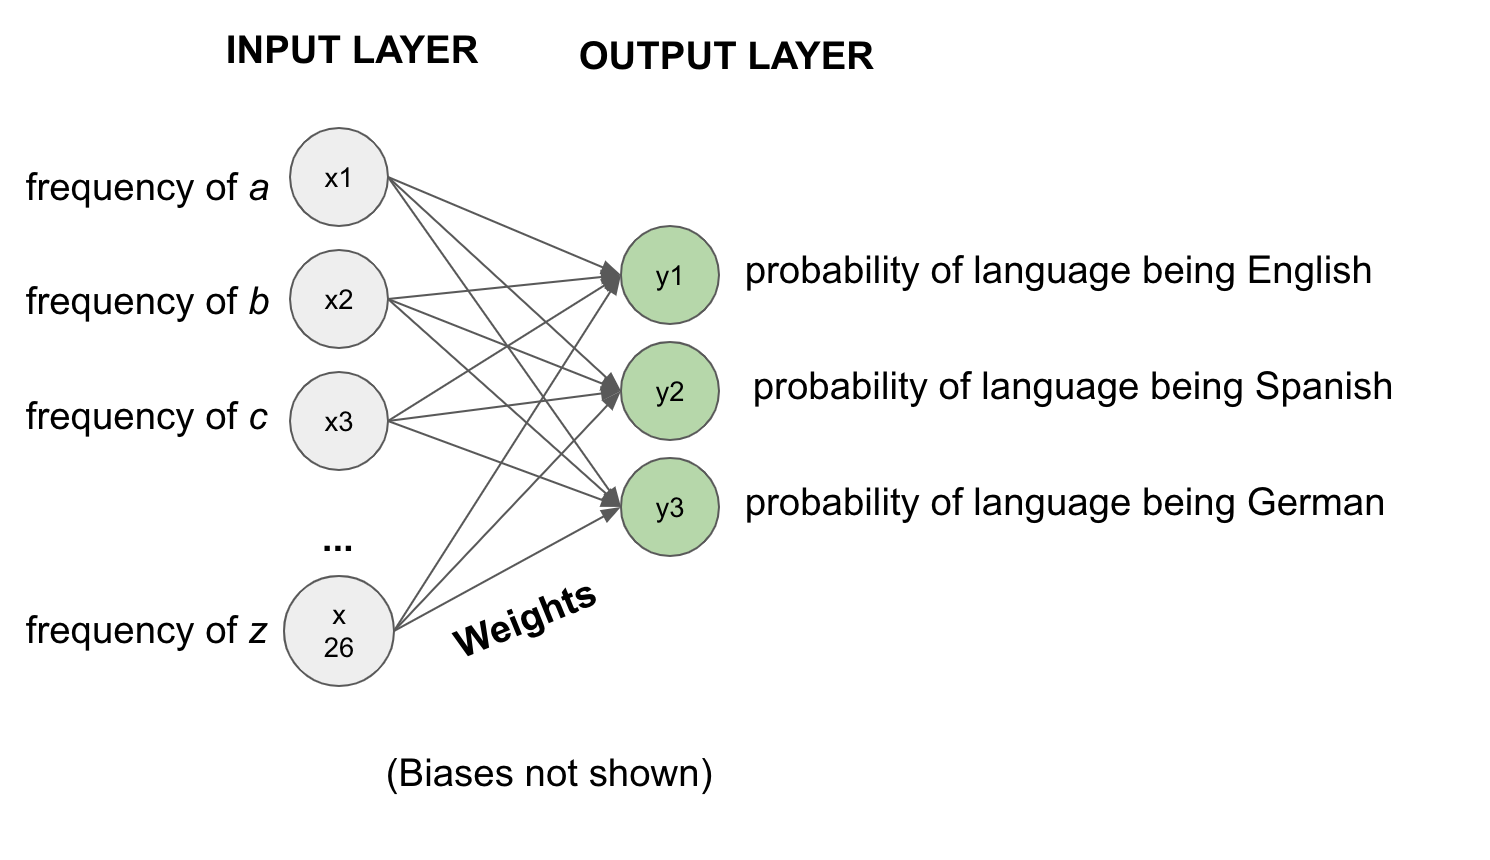

Notice the dimensions. Our input layer has shape `(26,)` (vector of size 26) and the output layer has shape `(3,)` (vector of size 3).

In [ ]:
import numpy as np
np.zeros(shape=(26,))

>So to review what we have in this architecture:

This is a **neural network** with an **input layer**, an **output layer**, and **no hidden layers**. The input layer has **26 neurons** and the output layer has **3 neurons**. There are **weights** connecting each node in the input layer to the output layer (that multiply with the input), and **biases** for each neuron that are added.

>And how does it learn?

The model makes a certain number of predictions and calculates a **loss** (see session 3 for a more detailed explanation of this). The model then uses **gradient descent** and a process called **backpropagation** (shortened to backprop or just BP) to iteratively adjust the weights and biases to improve the model's performance (minimize loss). Note that the weights and biases are called the **trainable parameters**, which should make sense.

### Hidden layers

This is all well and good, but we may suspect that the probem is more complex than pure linear combinations. This is what leads us to add **hidden layers** between our input and output layers, which allow for the model to learn more complex relationships between variables. That would look something like this:



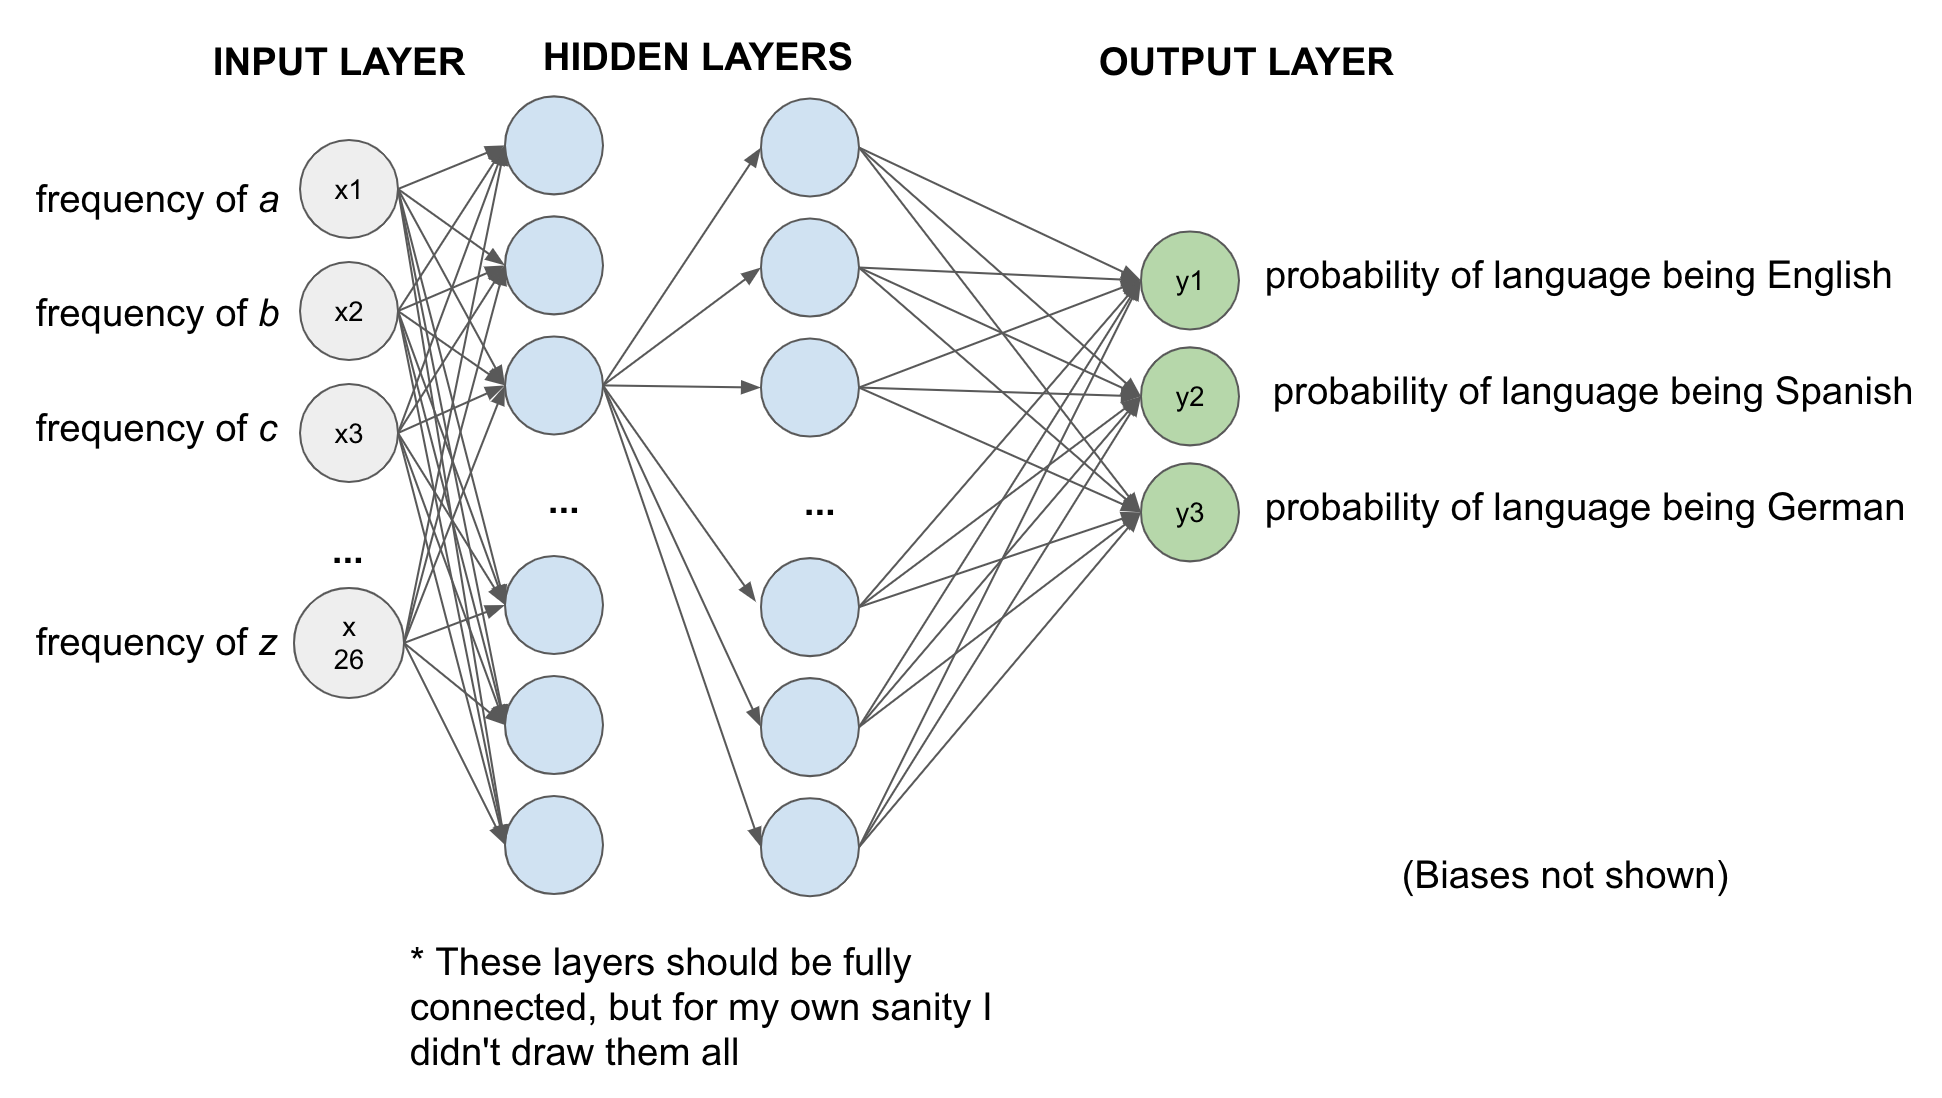

>Again, note the architecture:

Everything is the same as the previous example, except we now have **two hidden layers**. In our code, we would say how many neurons each of these hidden layers has. For example, the first could have 128 and the second could have 256 (powers of 2 are common). All of these layers are **densely connected**, meaning every neuron is connected to every neuron in the next layer.

>Wait, what happens inside a cell?

Good question! If we just performed linear combinations and stored that value in a cell, these numbers could get very big (positively or negatively). So, each cell applies an *activation function* to keep the value inside a cell relatively small. There are a few common activation functions like `relu`, `sigmoid`, and `tanh`. Feel free to look into these, or just remember that this happens.

>What about at the very end?

For multi-class classification problems, we use an activation function called `softmax` which is a generalization of the logistic function, but for multiple dimensions (as opposed to binary classification). You don't need to sweat this but do remember to use `softmax` activation for multiclass problems.

>How would the code for this look?

Something like this:

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# Build model 
model = Sequential()
model.add(Dense(128, input_dim=26, activation='relu')) # Input layer and first hidden layer
model.add(Dense(256, activation='relu')) # Second hidden layer
model.add(Dense(3, activation='softmax')) # Output layer
# Choose optimizer and loss function
opt = tf.keras.optimizers.Adam(lr=0.001)
loss = 'categorical_crossentropy'
# Compile 
model.compile(optimizer=opt, 
    loss=loss,
    metrics=['accuracy'])

model.summary()

Other important keywords:

- The **batch size** is a number of data points the model sees before updating its internal parameters. If the batch size is 1, then it backpropagates every time it sees a data point, and if it is 50, it only backpropagates after every 50 data points it sees.
- An **epoch** is a complete run-through of the training data. If you train a model for 10 epochs, it sees all the data 10 times.
- A **hyperparameter** is a parameter that does *not* get updated by backpropagation and are therefore not learned by the model. Rather, it is part of the architecture itself. For example, the number of hidden layers, the size of the hidden layers, and the batch size are all hyperparamters.

### Other neural nets!

There are many kinds of neural networks. Here are some examples:

- **Multilayer Perceptron (MLP)**: The 'vanilla' neural network, which is what we were just looking at!
- **Convolutional Neural Network (CNN)**: A type of neural network heavily used for 2D data, including images! [CNNs explained](https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/)
- **Long Short-Term Memory (LSTM)**: A type of RNN (recurrent neural network) with specially designed cells that work well with time-based data, like weather or stock prices! [LSTMs explained](https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21)

<img src="https://upload.wikimedia.org/wikipedia/commons/3/3b/The_LSTM_cell.png" height="600px" width="900px">

# Part 2: Other common ML models
First we import python modules:

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

We will first generate a dataset suitable for demonstration and applying classification algorithms using built-in function [`make_classification`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) in scikit-learn.

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, 
                           n_redundant=0, n_informative=2, 
                           n_clusters_per_class=2, 
                           random_state=1)

The binary classification dataset containing two features (or variables) is plotted below. 

In [ ]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k');

Let us split the dataset into training and testing sets:

In [ ]:
from sklearn.model_selection import train_test_split
# default is 75% / 25% train-test split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)

We create a logistic classifier using [`sklearn.linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [ ]:
from sklearn.linear_model import LogisticRegression

LR_clf = LogisticRegression()

Next we train the classifier using the training data:

In [ ]:
LR_clf.fit(X_train, y_train)

Now, we test the accuracy of the classifier on both training and testing dataset.

In [ ]:
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(LR_clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(LR_clf.score(X_valid, y_valid)))

We define the function to plot the decision boundaries of the classifier:

In [ ]:
def plot_decision_boundary(model, X, y):
    x1, x2 = X[:, 0], X[:, 1]
    x1_min, x1_max = x1.min() - 1, x1.max() + 1
    x2_min, x2_max = x2.min() - 1, x2.max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                         np.arange(x2_min, x2_max, 0.1))

    Z = model.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.4)
    plt.scatter(x1, x2, c=y, marker='o',
                s=25, edgecolor='k');

In [ ]:
plot_decision_boundary(LR_clf, X, y)

The above binary classification dataset was clearly separable by linear boundary, but that is not the case often. Next, we generate another dataset that is not linearly separable.

In [ ]:
from sklearn.datasets import make_gaussian_quantiles
X1, y1 = make_gaussian_quantiles(n_features=2, 
                                 n_classes=2, 
                                 random_state=12)

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=y1,
            s=25, edgecolor='k');

X1_train, X1_valid, y1_train, y1_valid = train_test_split(X1, y1, random_state=0)

We build a logistic regression model on this dataset.

In [ ]:
LR_clf2 = LogisticRegression().fit(X1_train, y1_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(LR_clf2.score(X1_train, y1_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(LR_clf2.score(X1_valid, y1_valid)))

plot_decision_boundary(LR_clf2, X1_train, y1_train)

Logistic regression is perhaps not a good choice for this kind dataset. We first test this dataset with other classification algorithms, namely:
- Decision Trees
- k-Nearest Neighbors
- Support Vector Machines (SVM)
- Random Forests

These algorithms are briefly introduced here first and we will revisit to learn more about them in the exercise session.

[Decision Tree classifier](https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052):

- Tree-like model of decisions
- Also known as CART (Classification And Regression Tree) algorithm
- Decision making is explicit and can be visualized
- Sensitive to the training data used. Slight changes in the training can lead to vastly different trees. This is one of the reasons we prefer Random Forest ensemble given below.
- Can create over-complex trees that over-fit to the training data

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f3/CART_tree_titanic_survivors.png" width="300" height="350" />
<p style="text-align: center;"> Decision Tree classifier for Titanic dataset </p>


In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT_clf = DecisionTreeClassifier().fit(X1_train, y1_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(DT_clf.score(X1_train, y1_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(DT_clf.score(X1_valid, y1_valid)))

plot_decision_boundary(DT_clf, X1, y1)

k-Nearest Neighbors classifier:
- Uses k-nearest neighbors from the training data to predict the label 
- Unsupervised learning

![](https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/03faee64-e85e-4ea0-a2b4-e5964949e2d1/d99b9a4d-618c-45f0-86d1-388bdf852c1d/images/screenshot.gif)

The default value for k is 5 in scikit-learn implementation.
4 Steps:
1. Randomly initialize k clusters centroids
2. For each training example, assign prediction to its closest cluster centroid.
3. For each cluster, set position of cluster centroid to average(mean) of points assigned to that cluster.
4. Iterate 2, 3

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier().fit(X1_train, y1_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_clf.score(X1_train, y1_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_clf.score(X1_valid, y1_valid)))

plot_decision_boundary(knn_clf, X1, y1)

Support Vector Machines (SVM):
- An extension of linear classification
- Separates the classes by choosing a hyperplane that maximizes the distance to the nearest data point on either side and hence known as maximum margin classifier.
- The data points that are closest to the decision boundary on either side are called support vectors.
- It minimize the classification error and at the same time maximizes the geometric margin 
- [Here](https://towardsdatascience.com/svm-and-kernel-svm-fed02bef1200) is a helpful article explaining SVMs with apples and lemons!

<img src="https://upload.wikimedia.org/wikipedia/commons/7/72/SVM_margin.png" width="350" height="350" />
<p style="text-align: center;"> Support Vector Machines (SVM) classifier </p>


Using the kernel trick to transform the feature space, SVM can learn non-linear decision boundaries. 

<img src="https://upload.wikimedia.org/wikipedia/commons/1/1b/Kernel_Machine.png" width="600" height="350" />
<p style="text-align: center;"> Using Kernel trick for Support Vector Machines (SVM) classifier </p>

In [ ]:
from sklearn.svm import SVC
svc_clf = SVC().fit(X1_train, y1_train)

print('Accuracy of Support Vector classifier on training set: {:.2f}'
     .format(svc_clf.score(X1_train, y1_train)))
print('Accuracy of Support Vector classifier on test set: {:.2f}'
     .format(svc_clf.score(X1_valid, y1_valid)))

plot_decision_boundary(svc_clf, X1, y1)

[Random Forest ensemble](https://machinelearningmastery.com/bagging-and-random-forest-ensemble-algorithms-for-machine-learning/): 
- Ensemble of decision tree classifiers which means it combines predictions from multiple decision tree classifiers to give a more accurate prediction than any individual tree.
- As noted earlier, decision trees are unstable, that is they are sensitive to the changes in training data. For the ensemble, we take bootstrap samples from the training data and built trees on it.
- Prone to over-fitting, though less prone than individual decision trees.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier(random_state=0).fit(X1_train, y1_train)

print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(RF_clf.score(X1_train, y1_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(RF_clf.score(X1_valid, y1_valid)))

plot_decision_boundary(RF_clf, X1, y1)

Smoother boundary usually suggests that it is less likely to be subjected to the noise and fluctations in training set and hence, less likely to over-fit. 

For this dataset:
* The support vector classifier with minimal difference between training and testing set accuracy and smoother decision boundary seems to have performed the best
* The decision tree algorithm seems to have suffered the most from over-fitting. 
* The logistic regression classifier seems to be under-fitting on account of being a poor fit for the problem.

The promise of neural networks is that they can learn almost any kind of decision boundary if we build our network deep enough with suitable architecture and train it long enough with sufficiently big dataset. All other methods have limitations in how complex of a boundary they can learn. However, unless we have an abundance of training examples and the computational power, simpler methods are a good answer to many problems in industry even today. 

# Part 3: Key takeaways

<img src="https://images.squarespace-cdn.com/content/v1/56f19dfb4d088e32bdf80799/1587922501998-14ODTFZJ2BDTQO7YWVKE/ke17ZwdGBToddI8pDm48kF7XTateWj6md6x9JeEx8zB7gQa3H78H3Y0txjaiv_0fDoOvxcdMmMKkDsyUqMSsMWxHk725yiiHCCLfrh8O1z5QPOohDIaIeljMHgDF5CVlOqpeNLcJ80NK65_fV7S1UcQ3LBX3nFqIgEwW1SNWcHb6uj2GNAWCrthT2xRQtbfxv31nTNa4bR0Fwgc9EJtadg/pasta%2B-%2B1%2B%25281%2529.jpg" height="400px">

*fig (1). Spaghetti thrown at a wall*

So what are the most important lessons from all four workshops? I've tried to summarize them all here:

- **Machine learning** comes in all kinds and flavors for all kinds of tasks. Some of the most common types of tasks are:
  - **Classification**: Assign a data point to a particular class
  - **Regression**: Assign a data point some continuous value
  - **Reinforcement learning**: Train an agent to interact with some environment

For classification and regression:

- **Understand** your problem before writing code!
  - Perform **research** to understand the problem better
  - **Explore** your data with tables and plots
  - Perform **feature engineering** to make your features as predictive as possible
- **Data is king**!
- **Select your model** with a reason, but don't be afraid to try a few different ones!
- Split your data into **training**, **validation**, and (if you have enough data) **test** sets to diagnose overfitting / test how generalizable your model is. For a slightly different approach, check out [k-fold cross validation](https://machinelearningmastery.com/k-fold-cross-validation/).
- While your model can learn trainable parameters, adjust your **hyperparameters** to see how they affect your model. There are also ways to automate testing different hyperparamters, like [grid search](https://scikit-learn.org/stable/modules/grid_search.html).

And most importantly...

- **Read!** Whenever you come across something you're not familiar with (which will probably be very often, unless you are [Ian Goodfellow](https://en.wikipedia.org/wiki/Ian_Goodfellow)), look it up! It's a great way to fill in your gaps in knowledge.
- **Code!** A hands-on approach is the best way for a human to learn how machines learn. [Kaggle](http://kaggle.com/) is a great place to get started.

## Happy learning!

<img src="https://wompampsupport.azureedge.net/fetchimage?siteId=7575&v=2&jpgQuality=100&width=700&url=https%3A%2F%2Fi.kym-cdn.com%2Fentries%2Ficons%2Ffacebook%2F000%2F028%2F926%2Fcove3.jpg">